<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_6_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#@title
#@title('Ind√≠t√°s ut√°n')
%%capture
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt


from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

from mpl_toolkits.mplot3d import Axes3D


# Fuzzy k√∂vetkeztet√©si rendszerek

Ebben a r√©szben a a fuzzy k√∂vetkeztet√©si rendszerek bemutat√°s√°val foglalkozom.

Ez az interkat√≠v bemutat√≥ a fuzzy k√∂vetkeztet√©st egyes l√©p√©sein √°t muatatja be az alapfogalmakat.

A jegyzetet Dr. Prof. Tak√°cs M√°rta tan√°rn≈ë - Fuzzy k√∂vetkeztet√©si rendszerek c√≠m≈± tant√°rgy√°hoz k√©sz√≠tettem a 2021/2 f√©l√©vben.


### A tant√°rgy tartalma:
Fuzzy oper√°torcsal√°dok √°ttekint√©se. A k√∂vetkeztet√©si rendszerek logikai, fuzzy logikai alapjai.
Bizonytalans√°g kezel√©se a k√∂vetkeztet√©si rendszerekben. √Åltal√°nos fuzzy k√∂vetkeztet√©si rendszerek. Szab√°lyalap√∫ rendszerek. Mamdani √©s Takagi-Sugeno m√≥dszer. Grafikus megjelen√≠t√©s MATLAB k√∂rnyezetben. √öj oper√°torcsal√°dokon alapul√≥ k√∂vetkeztet√©si rendszerek. M√©rn√∂ki alkalmaz√°sokban megjelen≈ë d√∂nt√©si probl√©m√°k numerikus m√≥dszerekkel t√∂rt√©n≈ë megold√°s√°nak lehet≈ës√©gei, √©s a fuzzy k√∂vetkeztet√©si rendszerek alkalmaz√°s√°nak lehet≈ës√©gei. Gazdas√°gi alkalmaz√°sokban alkalmazott fuzzy k√∂vetkeztet√©si rendszerek. K√∂rnyezetv√©delmi √©s term√©szettudom√°nyi alkalmaz√°sok. 

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf

<a name="tartalom"></a>

## Tartalom

Bevezet√©s

> [A l√°gy sz√°m√≠t√°si m√≥dszerekr≈ël](#a_lagy_szamitasi_modszerekrol)<br>
> [Fuzzy halmazok](#fuzzy_halmazok)<br>
> [Fuzzy tags√°gi f√ºggv√©nyek](#fuzzy_tagsagi_fuggvenyek)<br>
> [Fuzzifik√°ci√≥](#fuzzifikacio)<br>
> [Fuzzy metszetek](#fuzzy_metszetek)<br>
> [Fuzzy uni√≥k](#fuzzy_uniok)<br>
> [Szab√°lyalkot√°s](#szabalyalkotas)<br>
> [Aggreg√°ci√≥](#aggregacio)<br>
> [Defuzzifik√°ci√≥](#defuzzifikacio)<br>
> M√°sodik p√©lda [M√°sodik p√©lda](#pelda2)<br>
> Felhaszn√°lt irodalom [Felhaszn√°lt irodalom](#felhasznalt-irodalom)<br>





# Bevezet√©s

## A l√°gy sz√°m√≠t√°si m√≥dszerekr≈ël

A 'kem√©ny' sz√°m√≠t√°si m√≥dszerekkel szemben a 'l√°gy' sz√°m√≠t√°si m√≥dszerek nem √©les szab√°lyokat alkotnak, hanem egyfajta √°tmenetet k√©peznek  a bemenetek √©s a kimenet k√∂z√∂tt.

A 'l√°gy' sz√°m√≠t√°sok √∂tlet√©t Lofti Zadeh matematikus vetette fel. Elgondol√°sa szerint:

> Az emberi gondolkod√°sm√≥d sokkal jobban modellezhet≈ë olyan fogalmakkal, amelyeknek nincsenek √©les hat√°rai.

Sz√°mos tudom√°nyter√ºlet √©s alkalmaz√°sban haszn√°lhatunk l√°gy sz√°m√≠t√°si m√≥dszereket az orvostudom√°nyt√≥l, a t√°rsadalomtudom√°nyokon √°t{szociol√≥gia, k√∂zgazdas√°gtan}, komplex feladatok megold√°s√°n √°t √©s az optimaliz√°l√°s ter√ºlet√©n.


## Fuzzy logika √©s Fuzzy halmazok

A fuzzy halmazokat egy p√©ld√°n kereszt√ºl lehet k√∂zelebb hozni az emberi gondolkod√°shoz. Ha egy homokkupacb√≥l elveszek egy homokszemet akkor az m√©g homokkupac, de minn√©l t√∂bb homokszemet veszek el bel≈ële ann√°l kev√©sb√© lesz homokkupac. K√©rd√©s, mikort√≥l nem tekintem homokkupacnak? Ebb≈ël l√°that√≥, hogy az √°tmenet nem √©les. Nem mondhatom, hogy el≈ëbb m√©g homokkupac volt, de egy homokszem elv√©tele ut√°n m√°r nem az. Az √°tmenet ink√°bb folytonos √©s nem h√∫zhat√≥ √©les hat√°r.

## Mikor haszn√°ljunk fuzzy k√∂vetkeztet√©si rendszereket

Olyan rendszerekben, melyek folytonos bemenetekkel √©s nem line√°ris kimeneti f√ºggv√©nyekkel jellemezhet≈ëk. √âs/Vagy amikor sok t√©nyez≈ë, szempont, bemenet alapj√°n √©s ismeret√©ben kell d√∂nt√©st hozznunk √©s a szempontok √∂sszetettek.





<a name="fuzzy_halmazok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy halmazok <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## A k√©tr√©t√©k≈± logik√°ban
A halmazhoz tartoz√°s egy√©rtelm≈±en eld√∂nthet≈ë.

Legyen az A halmaz az X alalphalmaz egy r√©szhalmaza, akkor a karakterisztikus f√ºggv√©ny:

$$X_A:X \rightarrow \left\{ 0,1 \right\} $$
<br>
$$
X_A(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \in \mathbf{A} \\
        0 & \mbox{ha } \ x \notin \mathbf{A}
    \end{array}
\right.
$$

> r√©szhalmaz
$\mathbf{A} \subset \mathbf{B}$ vagy $\mathbf{A} \subseteq \mathbf{B}$ √©s ha $\mathbf{A} \subseteq \mathbf{B}$ √©s $\mathbf{B} \subseteq \mathbf{A}$ akkor $\mathbf{A} = \mathbf{B}$

> val√≥di r√©szhalmaznaz tekintj√ºk, ha $\mathbf{B}$-nek l√©tezik legal√°bb egy eleme ami nem eleme $\mathbf{A}$-nak

> halmaz elemeinek sz√°ma $|\mathbf{A}|$

> halmaz komplemense $\mathbf{\overline{A}}$ az $\mathbf{A}$-ban nem szerepl≈ë elemek.

<br>

<a name="fuzzy_tagsagi_fuggvenyek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy tags√°gi f√ºggv√©ny <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Az alaphalmaz minden elem√©hez valamilyen r√∂gz√≠tett tartom√°nyb√≥l rendel√ºnk √©rt√©kekekt. Az √©rt√©k nagys√°ga ar√°nyos a halmazhoz tartoz√°s m√©rt√©k√©vel. Ez az √©rt√©k jellemz≈ën 0-1 k√∂z√∂tt van.

A halmaz √©s a tags√°gi f√ºggv√©ny egyen√©rt√©k≈±<br>
Tags√°gi f√ºggv√©ny: $\mu_A:X \rightarrow [0,1]$ √©√©s Fuzzy halmaz: $A:X \rightarrow [0,1]$

P√©ld√°k a leggyakrabban haszn√°lt tags√°gi f√ºggv√©nyek t√≠pusokra.

<img src="https://user-images.githubusercontent.com/39605819/72969382-f8f7ec00-3d8a-11ea-9244-3c3b5f23b3ac.png">


A fuzzy tags√°gi f√ºggv√©ny el≈ë√°l√≠t√°sa (egy lehets√©ges p√©lda) (trap√©z)

$$
\mu_Ai(x) = \left\{
    \begin{array}\\
        0 & \mbox{ha } \ x \leq a_i \\
        \frac{x-a_i}{b_i-a_i} & \mbox{ha } \ a_i \leq x \leq b_i \\
        1 & \mbox{ha } \ b_i \leq x \leq c_i \\
        \frac{d_i-x}{d_i-c_i} & \mbox{ha } \ c_i \leq x \leq d_i \\
        0 & \mbox{ha } \ d_i \leq x
    \end{array}
\right.
$$

ahol, $a_i, b_i, c_i, d_i$ a tags√°gi f√ºggv√©ny param√©terei.




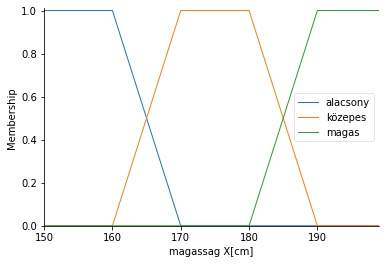

In [2]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

x                = np.arange(150, 200, 1)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

## Fuzzy halmazok

Ha √∫gy it√©lik meg, hogy a tags√°gi f√ºggv√©ny √©rt√©k is t√∫l prec√≠z a val√≥s√°gban, akkor az elemekhez a tags√°gi f√ºggv√©ny √©rt√©k helyett **intervallumot** rendelnek. Ez a m√≥dszer jelet≈ësen n√∂veli a sz√°m√≠t√°sig√©nyt. Jelenleg nem foglalkozom ezzel a m√≥dszerrel, de hogy el tudjuk k√©pzelni mit jelent ez, egy k√©ppel tudom illusztr√°lni.



In [3]:
(170-161) /(170-160)

0.9


<a name="fuzzifikacio"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzifik√°l√°s, Fuzzyfik√°ci√≥ <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Gyakorlatilag meghat√°rozzuk a tags√°gi f√ºggv√©nyeket, √©s az egyes crisp √©rt√©keket hozz√°juk rendelj√ºk. Al√°bb a testmagass√°g egy lehets√©ges fuzzifik√°ci√≥ja.

$A$ = {alacsony, k√∂zepes, magas}
<br>

$$
A_1(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \leq 150 \\
        \frac{170-x}{170-160} & \mbox{ha } \ 160 \leq x \leq 170 \\
        0 & \mbox{ha } \ 170 \leq x
    \end{array}
\right.
$$

Ez√©rt $A_1(175) = (170-165) /(170-160) = 0.5$



Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


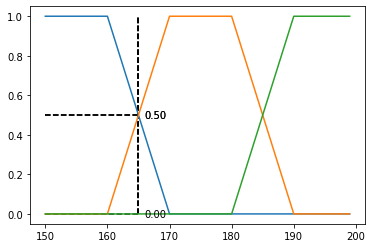

In [4]:

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(165)

In [5]:
interact(membershipDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), Output()), _dom_classes=('widg‚Ä¶

## Axi√≥m√°k

A: az X fuzzy halmaza

Defin√≠ci√≥ szerint ùë• ‚àà ùëã-nek az A halmazhoz tartoz√°s√°nak m√©rt√©ke: A(x)
Ekkor az A halmaz c t√≠pus√∫ komplemense ca(x) az az √©rt√©k, amilyen
m√©rt√©kben x nem tartozik A-hoz. A Fuzzy komplemens: ùëê: 0,1 ‚Üí 0,1 f√ºggv√©ny ‚àÄùê¥(ùë•) tags√°gi f√ºggv√©ny √©rt√©khez tetsz≈ëleges ‚ÄûA‚Äù fuzzy halmaz eset√©n a ùëê ùê¥ ùë• √©rt√©ket rendeli hozz√°.

$c1$ axi√≥ma: $c(0) = 1$ √©s $c(1) = 0$ (peremfelt√©tel)

$c2$ axi√≥ma: $\forall, b \in [0,1]$ eset√©n
ha $a \leq b$ akkor $c(a) \geq c(b)$ (monotonit√°s)

$c2$ azt √≠rja el≈ë, hogy a komplemens monoton cs√∂kken≈ë legyen: az $A$ halmaz
tags√°gi f√ºggv√©ny √©rt√©k√©nek n√∂veked√©s√©vel a komplemens $c(a)$ √©rt√©ke nem
n≈ëhet.

**Egyens√∫lyi pont**: az az $a$ √©rt√©k amire $c(a) = a$
Zadehn√©l $a = 0.5$ az egyens√∫lyi pont.

<br>

<a name="fuzzy_metszetek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy metszetek (A t-norm√°k)

A fuzzy metszetek minim√°lisan elv√°rt tulajdons√°gait axi√≥m√°k fogalmazz√°k meg, amelyek a Boole metszet fogalom term√©sztes √°ltal√°nos√≠t√°s√°t adj√°k.

$$t: [0,1] \times [0,1] \rightarrow [0,1]$$

$t_1$ axi√≥ma: $(t(a,1) = a, \forall a \in [0,1]$-re (peremfelt√©tel)

$t_2$ axi√≥ma: $b \leq c$-b≈ël k√∂vetkezik, hogy $t(a,b) \leq t(a,c), \forall a, b,c \in [0,1]$ (monotonit√°s)

$t_3$ axi√≥ma: $(t(a,b) = t(b,a), \forall a,b \in [0,1]-$-re (kommutativit√°s)

$t_4$ axi√≥ma: $(t(a,t(b,c)) = t(t((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativit√°s)

<br>

$t_2$ √©s $t_3$ azt a k√∂vetelm√©nyt fejezi ki, hogy ha $A$-ban vagy $B$-ben a tags√°gi √©rt√©k cs√∂kken, az nem eredm√©nyezheti a metszet $A \cap B$ n√∂veked√©s√©t.

<br>

Zadeh-f√©le metszet:

$$ t(a,b) = min(a,b) $$

Algebrai szorzat:

$$ t(a,b) = ab $$

Korl√°tos k√ºl√∂nbs√©g:

$$ t(a,b) = max(0,a+b-1) $$

P√©ld√°k:






Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


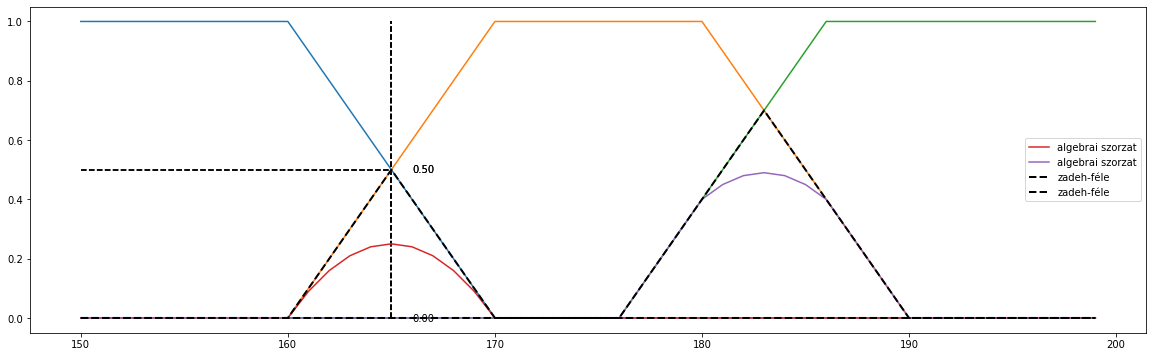

In [6]:



#@title
def membershipANDDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  algebrai = np.asarray(container[0])*np.asarray(container[1])
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  algebrai = np.asarray(container[1])*np.asarray(container[2])
  plt.plot(x, algebrai, label = 'algebrai szorzat')


  # zadeh f√©le fuzzy metszet
  zadeh = np.minimum(np.asarray(container[0]),np.asarray(container[1]))
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  zadeh = np.minimum(np.asarray(container[1]),np.asarray(container[2]))
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')



  plt.legend()

membershipANDDemo(165, 176, 186)

In [7]:
interact(membershipANDDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti‚Ä¶


<a name="fuzzy_uniok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy uni√≥k (t-kononrm√°k)

A fuzzy uni√≥k minim√°lisan elv√°rt tulajdons√°gait axi√≥m√°k fogalmazz√°k meg.

$$s: [0,1] \times [0,1] \rightarrow [0,1]$$

$s_1$ axi√≥ma: $(s(a,1) = a, \forall a \in [0,1]$-re (peremfelt√©tel)

$s_2$ axi√≥ma: $b \leq c$-b≈ël k√∂vetkezik, hogy $s(a,b) \leq s(a,c), \forall a, b,c \in [0,1]$ (monotonit√°s)

$s_3$ axi√≥ma: $(s(a,b) = s(b,a), \forall a,b \in [0,1]-$-re (kommutativit√°s)

$s_4$ axi√≥ma: $(s(a,s(b,c)) = s(s((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativit√°s)


<br>

Zadeh-f√©le uni√≥:

$$ s(a,b) = max(a,b) $$

Algebrai √∂sszeg:

$$ s(a,b) = a + b - ab $$

Korl√°tos √∂sszeg:

$$ s(a,b) = min(1,a+b) $$

P√©ld√°k:



Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


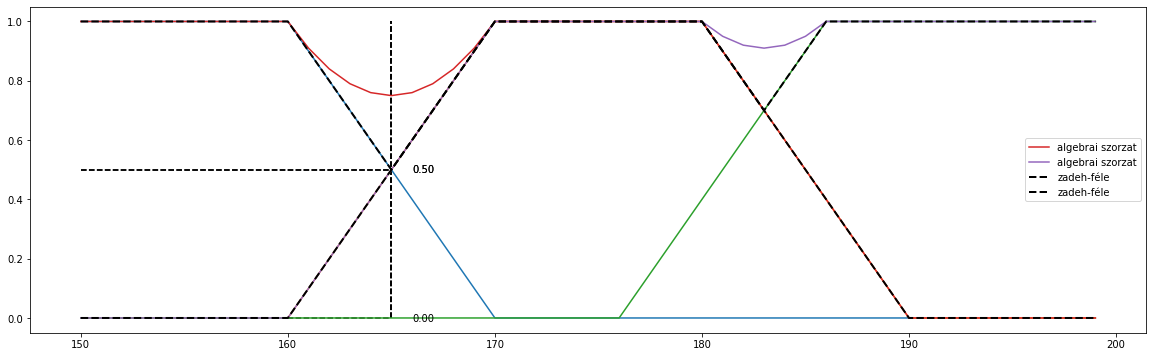

In [8]:
#@title
def membershipORDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  # zadeh f√©le fuzzy metszet
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  plt.legend()

membershipORDemo(165, 176, 186)

In [9]:
interact(membershipORDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti‚Ä¶


<a name="aggregacio"></a>

[vissza a tartalomhoz](#tartalom)

# Aggreg√°ci√≥

T√∂bb fuzzy halmaz megfelel≈ë m√≥don t√∂rt√©n≈ë egyes√≠t√©se √°ltal egyetlen fuzzy
halmazt √°ll√≠tanak el≈ë.

$$h[0,1]^n \rightarrow [0,1], n \geq 2$$

Ha a $h$ f√ºggv√©ny argumentumai az X alaphalmazon √©rtelmezett $A_1(x), ..., A_n(x)$ fuzzy halmazok, akkor $h \forall x \in X$-re fuzzy halmazt √°ll√≠t el≈ë az argumentumok tags√°gi √©rt√©keinek seg√≠ts√©g√©vel,

$$A(x) = h(A_1(x), ..., A_n(x))$$

Gyakorlatban ezt √∫gy √©rj√ºk el, hogy szab√°lyok konstru√°lunk √©s v√©g√ºl az √∂sszes szab√°ly alapj√°n el≈ë√°ll√≠tjuk az √∫j fuzzy halmazokat.

# Az implik√°ci√≥ annyiban k√ºl√∂nb√∂zik,

Az agreg√°ci√≥t√≥l, hogy egy v√°ltoz√≥n l√©trehozott tags√°gi f√ºggv√©nyek √©rt√©keinek kisz√°m√≠t√°s√°ra haszn√°lja a szakirodalom az implik√°ci√≥ sz√≥t.

M√≠g az aggreg√°ci√≥ az √∂sszes v√°ltoz√≥ra √©rv√©nyes szab√°ly alapj√°n l√©trehozott √©rt√©kek el≈ë√°ll√≠t√°s√°ra √©s √∫j fuzzy halmazhoz rendel√©s√©re haszn√°lj√°k.


Magassag['alacsony'](3) : 	0.80
Magassag['k√∂zepes'](3) : 	0.20
Magassag['magas'](3) : 	0.00


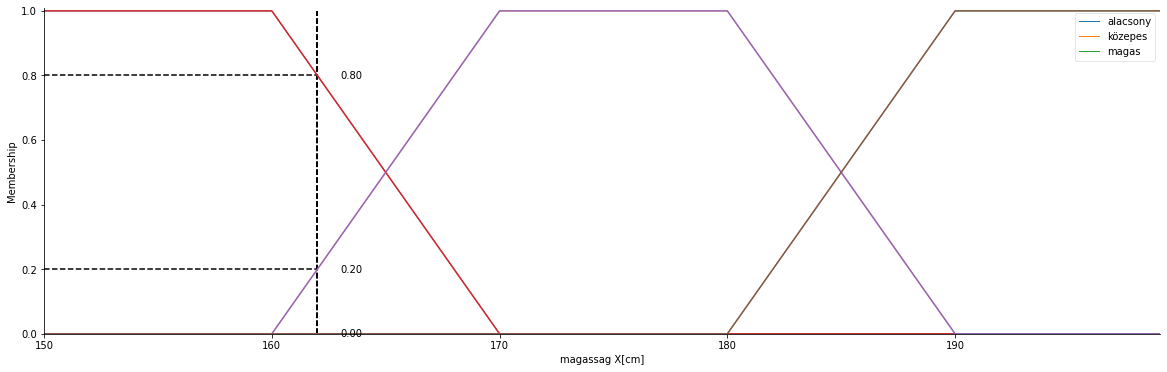

In [10]:
#@title


Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(162)

Testtomeg['sov√°ny'](3) : 	0.30
Testtomeg['k√∂zepes'](3) : 	0.70
Testtomeg['k√∂v√©r'](3) : 	0.00


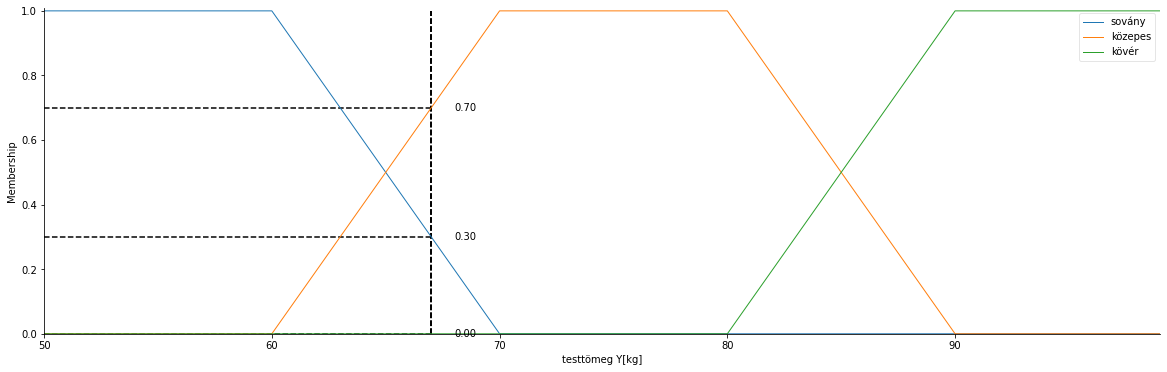

In [11]:
#@title

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testt√∂meg Y[kg]')

Testtomeg.defuzzify_method = 'centroid'
Testtomeg.universe.mean()

Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Testtomeg.view()

def testtomegDemo(x_):
  for key in Testtomeg.terms.keys():
    plt.plot(x, Testtomeg[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 50, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

testtomegDemo(67)




A k√©t fenti fuzzy halmaz egy lehets√©ges aggreg√°ci√≥ja



In [12]:
#@title
Allapot         = ctrl.Antecedent(np.arange(0, 40, 1), '√°llapot subjekt√≠v pontsz√°m')

Allapot.defuzzify_method = 'centroid'
Allapot.universe.mean()

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])

# Allapot.view()

In [13]:
#@title
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


In [14]:
magass√°g = 166
testt√∂meg = 88

Magassag['alacsony'](3) : 	0.40
Magassag['k√∂zepes'](3) : 	0.60
Magassag['magas'](3) : 	0.00
Testtomeg['sov√°ny'](3) : 	0.00
Testtomeg['k√∂zepes'](3) : 	0.20
Testtomeg['k√∂v√©r'](3) : 	0.80
IF magassag[magas] AND testtomeg[sov√°ny] THEN allapot[anorexia]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[sov√°ny] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[k√∂zepes] AND testtomeg[k√∂zepes] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[magas] AND testtomeg[k√∂v√©r] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[k√∂v√©r] THEN allapot[t√∫ls√∫lyos]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
√Ållapot  : 27.17424242424242
----------------------------------------
magassag : 166
testtomeg : 

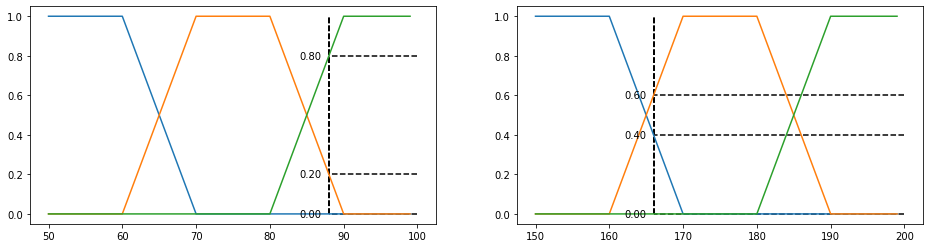

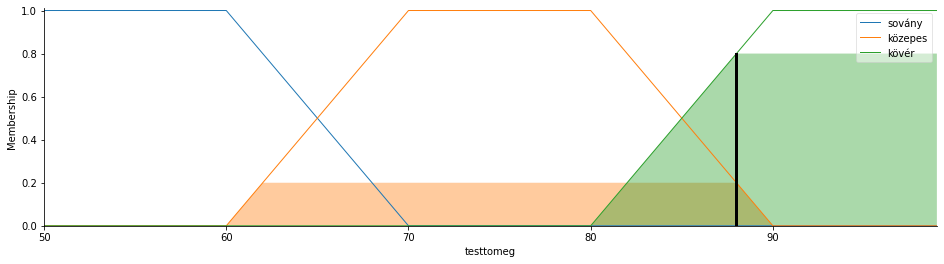

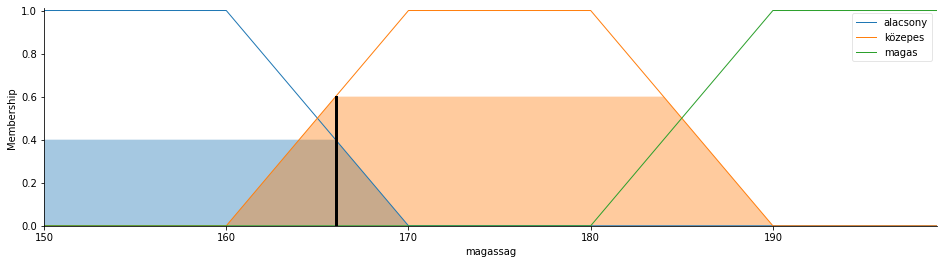

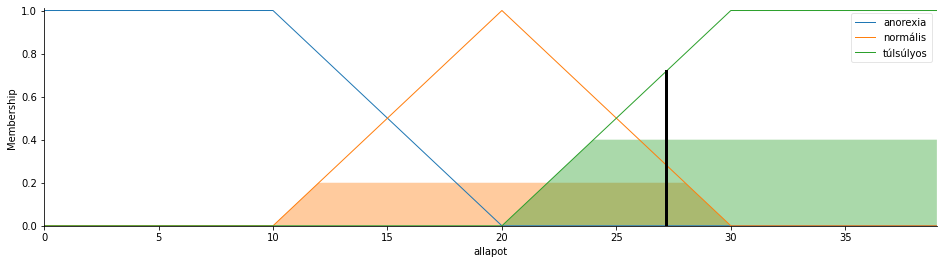

In [15]:
#@title

plt.rcParams["figure.figsize"] = (16,4)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])



# rules
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)


def testtomegDemo(x1_):

  x1 = np.arange(50, 100, 1)

  for key in Testtomeg.terms.keys():
    ax1.plot(x1, Testtomeg[key].mf)

    xv = x1_

    value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

    ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



#---------------------------------------------------------------------------


def magassagDemo(x2_):

  x2 = np.arange(150, 200, 1)

  for key in Magassag.terms.keys():
    ax2.plot(x2, Magassag[key].mf)

    xv = x2_

    value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

    ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


magassagDemo(magass√°g)

testtomegDemo(testt√∂meg)

#---------------------------------------------------------------------------


# a szab√°lyok
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)

# k√©t szab√°lyunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['magassag'] = magass√°g
simulation.input['testtomeg'] = testt√∂meg

simulation.compute()

print('----------------------------------------')
print('√Ållapot  :', simulation.output['allapot'])
print('----------------------------------------')
print(simulation.input)


Testtomeg.view(sim = simulation)
Magassag.view(sim = simulation)
Allapot.view(sim = simulation)


In [16]:
#@title
def demo(a1, a2, px=16, py=4):
  plt.rcParams["figure.figsize"] = (px,py)

  magass√°g = a1
  testt√∂meg = a2

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

  Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

  Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
  Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
  Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

  Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

  Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
  Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
  Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])


  # rules
  rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

  rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
  rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
  rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

  rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


  # plot
  fig, (ax1, ax2) = plt.subplots(1, 2)


  def testtomegDemo(x1_):

    x1 = np.arange(50, 100, 1)

    for key in Testtomeg.terms.keys():
      ax1.plot(x1, Testtomeg[key].mf)

      xv = x1_

      value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

      # print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

      ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



  #---------------------------------------------------------------------------


  def magassagDemo(x2_):

    x2 = np.arange(150, 200, 1)

    for key in Magassag.terms.keys():
      ax2.plot(x2, Magassag[key].mf)

      xv = x2_

      value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

      # print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

      ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


  magassagDemo(magass√°g)

  testtomegDemo(testt√∂meg)

  #---------------------------------------------------------------------------


  # k√©t szab√°lyunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['magassag'] = magass√°g
  simulation.input['testtomeg'] = testt√∂meg

  simulation.compute()

  # print('----------------------------------------')
  # print('√Ållapot  :', simulation.output['allapot'])
  # print('----------------------------------------')
  # print(simulation.input)


  Testtomeg.view(sim = simulation)
  Magassag.view(sim = simulation)
  Allapot.view(sim = simulation)

  return simulation

In [17]:
#@title
a1 = widgets.IntSlider(min=150, max=200, step=1, value=166)
a2 = widgets.IntSlider(min=50, max=100, step=1, value=88)
px = widgets.IntSlider(min=8, max=15, step=1, value=11)
py = widgets.IntSlider(min=2, max=10, step=1, value=3)

ui = widgets.HBox([a1, a2, px, py])

out = widgets.interactive_output(demo, {'a1': a1, 'a2': a2, 'px': px, 'py': py})

display(ui, out)


Output()

## Aggreg√°ci√≥ (folyt.)

A fenti p√©ld√°ban l√°ttauk , hogy A1(testt√∂meg) √©s A2(magass√°g) egy√ºttesen adt√°k a hozz√°rendel√©si szab√°lyokat.


```
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])
```

Most csak az 5 szab√°lyt figyelembe v√©ve n√©zz√ºk meg, hogy mi a hozz√°rendel√©si szab√°ly √©s hogyan alakul az √©rt√©k√ºk.

```
rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])
```

$\mu(X_{1_1} = 166) = 0.4$ magass√°g, alacsony

$\mu(X_{1_2}= 166) = 0.6$ magass√°g, k√∂zepes

$\mu(X_{1_3}= 166) = 0.0$ magass√°g, magas

$\mu(X_{2_1}= 166) = 0.0$ testt√∂meg, sov√°ny

$\mu(X_{2_1}= 166) = 0.2$ testt√∂meg, k√∂zepes

$\mu(X_{2_2}= 166) = 0.8$ testt√∂meg, k√∂v√©r

ez√©rt

$$w_1 = max(0.4, 0.8) = 0.4$$, az √Ållapot v√°ltoz√≥ 't√∫ls√∫lyos' tags√°gi f√ºggv√©ny√©hez tartoz√≥ √©rt√©k.

Egy m√°sik miatt pedig

```
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
```


$$w_2 = max(0.6, 0.2) = 0.2$$, az √Ållapot v√°ltoz√≥ 'norm√°lis' tags√°gi f√ºggv√©ny√©hez tartoz√≥ √©rt√©k.








# Defuzzifik√°ci√≥

A tags√°gi f√ºggv√©nyekhez tartoz√≥ [0, 1] √©rt√©ke folytonos √©rt√©kekk√© alak√≠t√°sa.

$$ y = \sum_{i=1}^{n}w_i*Y_B$$

Ahol $Y_B$ az aggreg√°ci√≥ ut√°n kapott kimeneti halmaz.

In [52]:
mfx1 = Allapot.__getitem__('norm√°lis').mf
mfx2 = Allapot.__getitem__('t√∫ls√∫lyos').mf

mx  = np.arange(0, mfx.size, 1)

defuzzification1_centroid = fuzzy.defuzz(mx, mfx1, 'centroid')
defuzzification2_centroid = fuzzy.defuzz(mx, mfx2, 'centroid')

print('cog[norm√°lis]  =', defuzzification1_centroid)
print('cog[t√∫ls√∫lyos]  =', defuzzification2_centroid)

# √Ållapot = w1 * COG(√Ållapot['anorixia']) + w2 * COG(√Ållapot['norm√°lis']) + w3 * COG(√Ållapot['t√∫ls√∫lyos']) / (w1 + w2 + w3)

# √Ållapot = ( 0.0 * 5 + 0.2 * 20 + 0.4 * 25 ) / ( 0.0 + 0.2 + 0.4 )

# √Ållapot = 27.80

result = ( 0.0 * 5 + 0.2 * defuzzification1_centroid + 0.4 * defuzzification2_centroid ) / ( 0.0 + 0.2 + 0.4 )

print(result)


cog[norm√°lis]  = 19.999999999999996
cog[t√∫ls√∫lyos]  = 31.702380952380953
27.801587301587297


In [47]:
simulation.output

OrderedDict([('allapot', 27.17424242424242)])

<a name="pelda2"></a>

[vissza a tartalomhoz](#tartalom)

# P√©lda 2

In [ ]:
plt.rcParams["figure.figsize"] = (14,5)

In [ ]:
# Create universe

√âtel         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')

Felszolg√°l√°s = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')

Borraval√≥    = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

In [ ]:
Borraval√≥.defuzzify_method = 'centroid'
Borraval√≥.universe.mean()

In [ ]:
√âtel.view()

In [ ]:
# Hat√°rozzuk meg a tags√°gi f√ºggv√©nyeket (ez esetben most a felh≈ëtakar√≥{napos})

√âtel['pocs√©k'] = fuzzy.trapmf(√âtel.universe, [0, 0, 1, 3])

√âtel.view()

In [ ]:
# Hat√°rozzuk meg a tags√°gi f√ºggv√©nyeket (ez esetben most a felh≈ëtakar√≥{felh≈ës})

√âtel['finom'] = fuzzy.trapmf(√âtel.universe, [7, 9, 10, 10])

√âtel.view()

In [ ]:
# Eddig megvagyunk a √âtel v√°ltoz√≥ tags√°gi f≈±ggv√©nyeivel {pocs√©k, finom}

# Most k√©sz√≠ts√ºk el a Felszolg√°l√°s tags√°gi f√ºggv√©nyeit is {rossz, j√≥, kiv√°ll√≥}

# Felszolg√°l√°s['rossz']   = fuzzy.zmf(Felszolg√°l√°s.universe, 0, 5)

Felszolg√°l√°s['rossz']   = fuzzy.gaussmf(Felszolg√°l√°s.universe, 0, 1.5)

Felszolg√°l√°s['j√≥']      = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)

# Felszolg√°l√°s['kiv√°ll√≥'] = fuzzy.smf(Felszolg√°l√°s.universe, 5, 10)

Felszolg√°l√°s['kiv√°ll√≥'] = fuzzy.gaussmf(Felszolg√°l√°s.universe, 10, 1.5)

Felszolg√°l√°s.view()

In [ ]:
# Most k√©sz√≠ts√ºk el a Borraval√≥ v√°ltoz√≥ tags√°gi f√ºggvy√©nyeit is {kev√©s, k√∂zepes, nagyvonal√∫}

Borraval√≥['kev√©s']      = fuzzy.trimf(Borraval√≥.universe, [0, 5, 10])
Borraval√≥['k√∂zepes']    = fuzzy.trimf(Borraval√≥.universe, [10, 15, 20])
Borraval√≥['nagyvonal√∫'] = fuzzy.trimf(Borraval√≥.universe, [20, 25, 30])

Borraval√≥.view()

In [ ]:
# Most k√©sz√≠ts√ºk el a szab√°lyokat

rule1 = ctrl.Rule(antecedent= Felszolg√°l√°s['rossz'] | √âtel['pocs√©k'], consequent = Borraval√≥['kev√©s'])

rule2 = ctrl.Rule(antecedent= Felszolg√°l√°s['j√≥'], consequent = Borraval√≥['k√∂zepes'])

rule3 = ctrl.Rule(antecedent= Felszolg√°l√°s['kiv√°ll√≥'] | √âtel['finom'], consequent = Borraval√≥['nagyvonal√∫'])


In [ ]:
def fuzzyDemo(Felszolg√°l√°s_ = 3, √âtel_ = 8):

  # rule1 = setRules(Type)

  # a szab√°lyok
  print(rule1)
  print(rule2)
  print(rule3)

  # k√©t szab√°lyunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['service'] = Felszolg√°l√°s_
  simulation.input['food'] = √âtel_

  simulation.compute()

  print('----------------------------------------')
  print('borraval√≥  :', simulation.output['tip'])
  print('----------------------------------------')
  print(simulation.input)

  Felszolg√°l√°s.view(sim = simulation)
  √âtel.view(sim = simulation)
  Borraval√≥.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tags√°ggi f√ºggv√©nyhez tartoz√≥ √©rt√©k√©t

In [ ]:
print(Felszolg√°l√°s.universe.shape)

# Felszolg√°l√°s['j√≥'] = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)
mfx = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)
print(mfx.shape)

# mik a tags√°ggi f√ºggv√©nyhez tartoz√≥ √©rt√©kek a k√∂vetkez pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(Felszolg√°l√°s.universe, mfx, [1.0, 2.0, 3.5, 5.0])

In [ ]:
print(Felszolg√°l√°s.__len__())
print(Felszolg√°l√°s.__getitem__('j√≥'))
a = Felszolg√°l√°s.__getitem__('j√≥')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# El√©g bonyolultan de le lehet h√≠vni Felszolg√°l√°s objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('j√≥').mf, [1, 2, 3.5, 5])

In [ ]:
# ide k√©ne egy olyan plotot raknom ami mutatja az adott f√ºggv√©nyt, √©s mutatja az egyes x, hez tartoz√≥ √©rt√©ket mink√©t (ha egyn√©l t√∂bb √°tviteli f√ºggv√©nyhez is tartozik az y)

In [ ]:
plt.plot(Felszolg√°l√°s['j√≥'].mf)
plt.plot(Felszolg√°l√°s['rossz'].mf)
plt.plot(Felszolg√°l√°s['kiv√°ll√≥'].mf)

print(Felszolg√°l√°s.terms)

# El√©g bonyolultan de le lehet h√≠vni Felszolg√°l√°s objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
y_service_good    = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('j√≥').mf, [3])
y_service_bad     = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('rossz').mf, [3])
y_service_exelent = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('kiv√°ll√≥').mf, [3])


print("Felszolg√°l√°s['rossz'](3) : \t{0:0.2f}".format(y_service_bad[0]))
print("Felszolg√°l√°s['j√≥'](3) : \t{0:0.2f}".format(y_service_good[0]))
print("Felszolg√°l√°s['kiv√°ll√≥'](3) : \t{0:0.2f}".format(y_service_exelent[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_service_bad, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_service_good, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_service_bad[0], '{:0.2f}'.format(y_service_bad[0]), verticalalignment = 'center')
plt.text(31, y_service_good[0], '{:0.2f}'.format(y_service_good[0]), verticalalignment ='center')



In [ ]:
√âtel.terms

In [ ]:
# El√©g bonyolultan de le lehet h√≠vni √âtel objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
fuzzy.interp_membership(√âtel.universe, √âtel.__getitem__('finom').mf, [8])

In [ ]:
for key in √âtel.terms.keys():
  print(key)

In [ ]:
for key in √âtel.terms.keys():
  plt.plot(√âtel[key].mf)

  value = fuzzy.interp_membership(√âtel.universe, √âtel.__getitem__(key).mf, [8])

  print("√âtel['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')




## A bemeneti v√°ltoz√≥k √©s a hozz√° tartoz√≥ √©rt√©keke a k√∂vetkez≈ëek



In [ ]:
# Teh√°t a bemeneti v√°ltoz√≥k √©s a hozz√° tartoz√≥ √©rt√©keke a k√∂vetkez≈ëek

# Felszolg√°l√°s = 3 -> Felszolg√°l√°s['rossz'](0.14) √©s Felszolg√°l√°s['j√≥'](0.41)

# √âtel = 8 -> √âtel['pocs√©k](0.00) √©s √âtel['finom'](0.5)

## Az aggreg√°ci√≥s szab√°lyok


In [ ]:
# Tekints√ºk most √°t a szab√°lyokat

# rule1 = ctrl.Rule(antecedent= Felszolg√°l√°s['rossz'] | √âtel['pocs√©k'], consequent = Borraval√≥['kev√©s'])

# Felszolg√°l√°s['rossz'](0.14) OR √âtel['pocs√©k'](0.00) -> Borraval√≥['kev√©s'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolg√°l√°s['j√≥'], consequent = Borraval√≥['k√∂zepes'])

# Felszolg√°l√°s['j√≥'](0.41) -> Borraval√≥['k√∂zepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolg√°l√°s['kiv√°ll√≥'] | √âtel['finom'], consequent = Borraval√≥['nagyvonal√∫'])

# Felszolg√°l√°s['kiv√°ll√≥'](0.00) OR √âtel['finom'](0.5) -> Borraval√≥['nagyvonal√∫'] -> max(0.00, 0.50) = 0.50

## Aggreg√°ci√≥

In [ ]:

# Teh√°t a h√°rom szab√°ly alapj√°n a kimeneti v√°ltoz√≥ (Borraval√≥) mindh√°rom {kev√©s, k√∂zepes, nagyvonal√∫} tags√°gi f√ºggv√©ny akt√≠v lesz

# A fenti sz√°m√≠t√°sok alapj√°n a k√∂vetkez≈ë k√©pen

# rule1 -> Borraval√≥['kev√©s'] = 0.14
# rule2 -> Borraval√≥['k√∂zepes'] = 0.41
# rule3 -> Borravol√≥['nagyvonal√∫'] = 0.5


<a name="defuzzifikacio"></a>

## Defuzzifik√°ci√≥<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

###(Mamdani-style)

A leggyakrabban haszn√°lt de-fuzzyfik√°ci√≥s elj√°r√°s a k√∂z√©p√©rt√©k, vagy centroid m√≥dszer (center of gravity). Azt a pontot keresi meg, amely az aggreg√°lt ter√ºletet k√©t egyenl≈ë r√©szre bontja, a k√∂vetkez≈ë m√≥don:

$$ COG = \frac{\int_{a}^{b} \mu_A(x)x\ dx}{\int_{a}^{b} \mu_A(x)\ dx}$$

<br>


In [ ]:

# Borraval√≥ = w1 * COG(Borraval√≥['kev√©s']) + w2 * COG(Borraval√≥['k√∂zepes']) + w3 * COG(Borraval√≥['nagyvonal√∫']) / (w1 + w2 + w3)

# Borraval√≥ = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borraval√≥ = 18.42

( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

## Interakt√≠v Demo

In [ ]:
f = interact(fuzzyDemo, Felszolg√°l√°s_ = (0, 10), √âtel_ = (0, 10));

In [ ]:
sim = f.widget.result

In [ ]:
type(sim)

In [ ]:
# a sim objektumb√≥l a v√©geredm√©nyt √≠gy lehetem visszakapni

# legf≈ëk√©ppen azt, hogy a Borraval√≥ objektum egyes tags√°gi f√ºggv√©nyein milyen √©rt√©kek vannak
# √©s azt, hogy a hozz√° tartoz√≥ √©rt√©k alapj√°n a k√ºl√∂nb√∂z≈ë f√ºggv√©ny alatti ter√ºlet sz√°m√≠t√°√°si m√≥dszerekkel
# (itt most csak COG) milyen de-fuzzyfik√°ci√≥s √©rt√©ket kap

In [ ]:
sim.output

## A teljes kimeneti t√©r √°br√°zol√°sa a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben

In [ ]:

# Ez ki√©rt√©kel√©s nagyobb felbont√°ssal is elv√©gezhet≈ë te t√∂bb sz√°m√≠t√°ssal j√°r

felszolgalas_space = np.linspace(0, 10, 10)
etel_space = np.linspace(0, 10, 10)
x, y = np.meshgrid(felszolgalas_space, etel_space)
z = np.zeros_like(x)


# Kisz√°m√≠tjuk a rendszer kimeneteti √©rt√©k√©t a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben
for i in range(10):
  for j in range(10):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

In [ ]:
# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('√âtel min≈ës√©ge')
ax.set_ylabel('Felszolg√°l√°s m√≠n≈ës√©ge')
ax.set_zlabel('Borraval√≥ %')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

## Surface Graphic

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# A ki√©rt√©kel√©s nagyobb felbont√°ssal is elv√©gezhet≈ë de t√∂bb sz√°m√≠t√°ssal j√°r

service = np.linspace(0, 10, 20)
food    = np.linspace(0, 10, 20)

x, y = np.meshgrid(service, food)

z = np.zeros_like(x)

z.shape

In [ ]:
# Az el≈ëz≈ën√©l nagyobb felbont√°sban, ugyan az kis√©rlet.

# A k√©t bemeneti v√°ltoz√≥t 20 egyenl≈ë l√©p√©sben vizsg√°lva az √∂sszes lehets√©ges
# kombin√°ci√≥ra kisz√°molt √©rt√©kek. Majd ezeket fogom √°br√°zolni egy 3 dimenzi√≥s
# interakt√≠v program seg√≠ts√©g√©vel

for i in range(len(service)):
  for j in range(len(food)):
    sim.input['service'] = x[i, j]
    sim.input['food'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

# Ez az √°br√°zol√°si m√≥d b√°r l√°tv√°nyos, kett≈ën√©l t√∂bb bemeneti v√°ltoz√≥n√°l
# t√∂bbet nem tudunk √°br√°zolni, √≠gy haszn√°lhat√≥s√°ga er≈ësen korl√°tozott.
# Az al√°bbi p√©ld√°t ink√°bb didaktikai c√©lb√≥l hoztam l√©tre

In [ ]:
%%capture
!pip install plotly
!pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = 'A kimeneti v√°ltoz√≥ √©rt√©ke a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben', autosize=False,
                  width = 700, height = 500,
                  scene = dict(
                    xaxis_title = 'food',
                    yaxis_title = 'service',
                    zaxis_title = 'tip %'),
                  margin = dict(l = 65, r = 50, b = 65, t = 60))

fig.show()


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhaszn√°lt irodalom √©s internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Fuzzy Inference Part 4
<br>
https://www.youtube.com/watch?v=Q6QDVIwztyU


Math AP¬ÆÔ∏é/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals

Getting Started with Fuzzy Logic Toolbox (Matlab)
<br>
https://www.youtube.com/watch?v=LupUhRJo_sU

How to work with Fuzzy Membership functions in Matlab
<br>
https://www.youtube.com/watch?v=vG3w4JVAKa0

------------

[2]
P. R. Peebles Jr., ‚ÄúCentral Limit Theorem‚Äù in ‚ÄúProbability, Random Variables and Random Signal Principles‚Äù, 4th ed., 2001, pp. 51, 51, 125.


[3]
Sz√©kely M√°ria - Barna Ildik√≥, "T√∫l√©l≈ë k√©szlet az SPSS-hez", 2008 Typotex, ISBN: 9789632790121

------------


Digit√°lis Tank√∂nyvt√°r - Fuzzy rendszerek
K√≥czy T. L√°szl√≥, Tikk Domonkos
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tkt/fuzzy-rendszerek-fuzzy/ch03.html


Digit√°lis Tank√∂nyvt√°r - A bizonytalans√°gi k√∂vetkeztet√©s egy√©b m√≥dszerei
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html








```
# K√∂sz√∂n√∂m a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```
